In [149]:
import os
import PIL
import shutil
from tqdm import tqdm
from pathlib import Path


### 画框图替换为原图
- 背景：yolo detect.py --save-txt 输出的结果为yolo格式的label txt文件，和已经draw box的图片
- 文件夹格式：根文件夹 -- 子文件夹 -- 图片.jpg + label.txt + classes.txt
- 目的：将draw box的图片替换为同名原图

In [169]:
# check each image file match
# and save their path as src/dst list

src_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/capture'
# dst_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel'
dst_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/capture_labelled'

# src_img_list = []
dst_folder_list = [
    f for f in os.listdir(dst_folder)
    if os.path.isdir(os.path.join(dst_folder, f))
]

for f in tqdm(dst_folder_list):
    # src_img_list = [os.path.join(src_folder, file) for file in src_img_list]
    # dst_img_list = [os.path.join(dst_folder, file) for file in dst_img_list]
    dst_f = os.path.join(dst_folder, f)
    dst_img_list = [file for file in os.listdir(dst_f) if file.endswith('.jpg')]

    src_f = os.path.join(src_folder, f)
    src_img_list = [file for file in os.listdir(src_f) if file.endswith('.jpg')]


    # check each image file match
    # for name in src_img_list:
    #     assert name in dst_img_list, f'{name} not in dst folder'
    for name in dst_img_list:
        assert name in src_img_list, f'{name} not in src folder'

    # replace


    for name in dst_img_list:
        try:
            shutil.copyfile(os.path.join(src_f, name),
                            os.path.join(dst_f, name))
        except shutil.SameFileError:
            pass


100%|██████████| 40/40 [00:20<00:00,  2.00it/s]


In [146]:
os.path.join(src_folder, f)


'/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.21.11.07.9470'

### 删除多余标注文件
从视频中截的图片的标注结果，很多张有重叠的菜品。人工预标注过程中，会删除一部分图片，保留菜品多的图。从而剩下部分图片已经删除但对应标签没删除。下面脚本会删除这些标签文件。

文件夹中包含多个txt jpg文件，通过文件名前缀对应。

程序输入为文件夹路径，然后遍历所有txt jpg文件，筛选出没有对应jpg的txt文件，并删除。

In [58]:
import os
from pathlib import Path

path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/001'

imglist = []
labellist = []
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        imglist.append(filename)
    elif filename.endswith('.txt'):
        labellist.append(filename)
    else:
        pass

files_to_remove = []
perfix_list = [Path(filename).stem for filename in imglist]
for filename in labellist:
    perfix = Path(filename).stem
    if perfix not in perfix_list:
        files_to_remove.append(filename)

# remove these files
files_to_remove = [os.path.join(path, filename) for filename in files_to_remove]
for src in files_to_remove:
    os.remove(src)

In [95]:
import os
from pathlib import Path
# the funciton wrapping the above program
# args: path: the path of folder to be clean
# return: None
def rm_useless_labelfile(path):
    # path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/001'

    imglist = []
    labellist = []
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            imglist.append(filename)
        elif filename.endswith('.txt'):
            labellist.append(filename)
        else:
            pass

    files_to_remove = []
    perfix_list = [Path(filename).stem for filename in imglist]
    for filename in labellist:
        perfix = Path(filename).stem
        if perfix not in perfix_list:
            files_to_remove.append(filename)

    # remove these files
    files_to_remove = [os.path.join(path, filename) for filename in files_to_remove]
    print(f'There are {len(files_to_remove)} label files to remove')
    for src in files_to_remove:
        os.remove(src)


In [103]:
# 文件夹名 001～009
for i in range(1, 10):
    folder_path = f'/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/00{i}'
    rm_useless_labelfile(folder_path)

There are 2 label files to remove
There are 7 label files to remove
There are 7 label files to remove
There are 0 label files to remove
There are 2 label files to remove
There are 2 label files to remove
There are 2 label files to remove
There are 1 label files to remove
There are 0 label files to remove


In [92]:
# 其他文件夹
root_path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel'
folder_list = os.listdir(root_path)
folder_list = [os.path.join(root_path, name) for name in folder_list]
print(folder_list)


['/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.21.41.42.6360', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.21.05.22.9010', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.16.30.06.1530', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.32.46.0509', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.15.43.08.6150', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.16.53.14.3140', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.43.06.3540', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/.DS_Store', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.20.55.36.6090', '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.15.34.29.27

In [96]:
# 其他文件夹名
folder_list = [
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.21.41.42.6360',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.21.05.22.9010',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.16.30.06.1530',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.32.46.0509',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.15.43.08.6150',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.16.53.14.3140',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.43.06.3540',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.20.55.36.6090',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.15.34.29.2710',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.20.44.43.0520',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.52.06.3130',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.16.07.45.6270',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.22.02.11.5230',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.16.32.23.6080',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.21.20.37.7650',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.14.57.4750',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.15.13.50.6070',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.15.53.27.2940',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.21.00.24.5940',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.20.42.44.4730',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.15.32.51.5130',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.20.53.45.1880',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.20.28.42.0400',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.16.21.14.3479',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.22.18.22.4590',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.21.49.49.1310',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.17.24.00.8020',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.16.07.04.4240',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.17.42.37.6810',
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.21.11.07.9470'
]
for folder_path in folder_list:
    rm_useless_labelfile(folder_path)

There are 36 label files to remove
There are 84 label files to remove
There are 64 label files to remove
There are 89 label files to remove
There are 102 label files to remove
There are 62 label files to remove
There are 111 label files to remove
There are 41 label files to remove
There are 63 label files to remove
There are 27 label files to remove
There are 70 label files to remove
There are 85 label files to remove
There are 49 label files to remove
There are 65 label files to remove
There are 40 label files to remove
There are 84 label files to remove
There are 101 label files to remove
There are 71 label files to remove
There are 59 label files to remove
There are 79 label files to remove
There are 51 label files to remove
There are 82 label files to remove
There are 53 label files to remove
There are 56 label files to remove
There are 62 label files to remove
There are 73 label files to remove
There are 71 label files to remove
There are 167 label files to remove
There are 97 lab

### 删除多余无用图片
数据集中有大量空白背景图片，在预标注方案中不需要这些图，一个个删除太麻烦。

实用相似度比较方法，筛选出空白背景的图片。

In [1]:
import cv2
import os
from tqdm import tqdm 
STAY, MOVE = 0, 1
def check_status(prev, cur, stay_ratio, diff_thresh=255 * 0.4):
    # First check the diff value: [0~255] diff_thresh
    # then check the diff percent over all frame: [0~1] stay_ratio

    # Args
    # prev: np.ndarray, the previous frame
    # cur: np.ndarray, the current frame
    # stay_ratio: float, 0~1, the ratio of moving pixel number over total
    #   judge STAY if diff pixel ratio > stay_ratio
    # diff_thresh: float, 0~255, the absolute threshold to split diff frames
    diff = cv2.absdiff(cur, prev)
    diff = cv2.threshold(diff, thresh=diff_thresh, maxval=255, type=cv2.THRESH_BINARY)[1]

    # count percent of diff pixels in image
    diff_percent = (diff == 255).sum() / (diff.shape[0] * diff.shape[1])
    status = MOVE if diff_percent > stay_ratio else STAY

    return status, diff, diff_percent


In [8]:
bg_path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.32.46.0509/1649008396.627292.jpg'
# path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.32.46.0509/1649008397.092101.jpg'
background = cv2.cvtColor(cv2.imread(bg_path), cv2.COLOR_BGR2GRAY)
stay_ratio = 0.10


tmp_img = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-22.16.32.46.0509/1649008397.945185.jpg'
frame = cv2.cvtColor(cv2.imread(tmp_img), cv2.COLOR_BGR2GRAY)
if_move, diff, diff_percent = check_status(prev=background, cur=frame, stay_ratio=stay_ratio)
print(if_move, diff_percent)

0 0.0012041859567901235


100%|██████████| 187/187 [00:03<00:00, 60.85it/s]
18it [00:00, 20.30it/s]


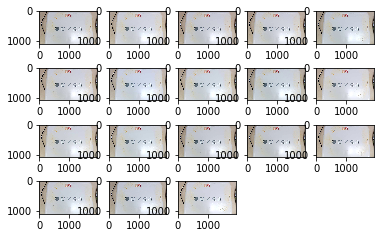

In [83]:
folder_to_check = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.22.02.11.5230'

# get all similar images to background in the folder
bg_paths = [
    '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.22.02.11.5230/1649007953.222882.jpg',
    # '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-28.15.32.51.5130/1649008390.878613.jpg'
]
backgrounds = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2GRAY) for p in bg_paths]

stay_ratio = 0.03
sim_imgs = []
for name in tqdm(os.listdir(folder_to_check)):
    if name.endswith('.jpg'):
        img_path = os.path.join(folder_to_check, name)
        frame = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
        status = 1
        for bg in backgrounds:
            if_move, diff, diff_percent = check_status(prev=bg, cur=frame, stay_ratio=stay_ratio)
            status = status and if_move
        if not status:
            sim_imgs.append(img_path)


# view and check if delete these images
from matplotlib import pyplot as plt
plt.figure()
for i, img_path in tqdm(enumerate(sim_imgs)):
    plt.subplot(len(sim_imgs) // 5 + 1, 5, i + 1)
    frame = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.imshow(frame)


In [84]:
# confirm delete
for path in sim_imgs:
    os.remove(path)

### 数据迭代清理
将yolo-format数据集中的bounding box图片裁出来

送入cnn中提取特征

In [1]:
import os
from PIL import Image
from pathlib import Path
from tqdm import tqdm

In [2]:
path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/'
imglist = []
for root, folders, files in os.walk(path):
    for f in files:
        if f.endswith('.jpg'):
            imglist.append(os.path.join(root, f))
print(len(imglist))

696


In [100]:
# find corresponding label txt files
not_exist_labels = []
for path in imglist:
    labelpath = path.replace('.jpg', '.txt')
    if not os.path.exists(labelpath):
        print(f'{labelpath} not exists')
        not_exist_labels.append(labelpath)

if len(not_exist_labels) == 0:
    print('all files match')

# the images without labels are all background images, all removed


/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008656.1441011.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008659.345849.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008684.479831.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008669.353631.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008667.468439.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008671.489113.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008671.32763.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008686.262667.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008687.990689.txt not exists
/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/003/1649008667.1082098.txt not exists
/Users/jiahua/Downl

In [3]:
# same as above
not_exist_labels = []
for path in imglist:
    labelpath = path.replace('.jpg', '.txt')
    if not os.path.exists(labelpath):
        print(f'{labelpath} not exists')
        not_exist_labels.append(labelpath)

if len(not_exist_labels) == 0:
    print('all files match')

all files match


**半监督训练**

准备两个文件夹，文件夹1放人工标注的数据，文件夹2放自动标注/待确认的数据
1. 手动标注方法：将文件夹2中的图片，手动移动到文件夹1中对应类别的子文件夹
2. 基于文件夹1，训练分类器
3. 使用新分类器自动分类剩余图片，并分配到文件夹2
4. 重复1步骤，直到确认无误

建立两个表来存储相关数据，一个是对于整张图片，另一个是对于box中的区域的图片，values也是dict形式

Table1
|key|values|||
|---|---|---|---|
|img_id |img_path | label_path | boxes(box_ids) |
|str|str|str|list|

Table2
|key|values||||
|---|---|---|---|---|
|box_id |img_id |xywh|class|status(-1,0,1)|
|str|str|str|str|int|

-1 是未标注，0 已标注，1 是已确认

第2步时，table2中对应的status改为0,训练后改为1

第3步时，将table2中标注status为-1的图片

再准备第三个文件夹，存放已经确认的box用作备份，每次训练完成后将已经确认的box转移到该文件夹

In [4]:
labelled_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/labelled'
toConfirm_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/toConfirm'
confirmed_folder = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/confirmed'
os.makedirs(labelled_folder, exist_ok=True)
os.makedirs(toConfirm_folder, exist_ok=True)
os.makedirs(confirmed_folder, exist_ok=True)

In [5]:
# generate table1
img_data = {}
box_data = {}
for path in imglist:
    # path is '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.jpg'
    img_id = Path(path).stem
    labelpath = path.replace('.jpg', '.txt')

    with open(labelpath, 'r') as f:
        boxes = f.readlines()
    boxes = [line.strip().split(' ') for line in boxes]
    box_ids = []
    for i, box in enumerate(boxes):
        box_id = f'{img_id}_{i}'
        box_data[box_id] = {
            'img_id': img_id,
            'xywh': box[1:],
            'class': box[0],
            'status': -1
        }
        box_ids.append(box_id)
    
    img_data[img_id] = {
        'img_path': path,
        'label_path': labelpath,
        'boxes': box_ids
    }
    

In [34]:
list(box_data.items())[:3]

[('1649008854.840437_0',
  {'img_id': '1649008854.840437',
   'xywh': ['0.446094', '0.641667', '0.320312', '0.527778'],
   'class': '0',
   'status': -1}),
 ('1649008854.840437_1',
  {'img_id': '1649008854.840437',
   'xywh': ['0.336719', '0.219444', '0.298438', '0.427778'],
   'class': '0',
   'status': -1}),
 ('1649008854.840437_2',
  {'img_id': '1649008854.840437',
   'xywh': ['0.714583', '0.230556', '0.298958', '0.440741'],
   'class': '0',
   'status': -1})]

In [35]:
list(img_data.items())[:3]


[('1649008854.840437',
  {'img_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.jpg',
   'label_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.txt',
   'boxes': ['1649008854.840437_0',
    '1649008854.840437_1',
    '1649008854.840437_2',
    '1649008854.840437_3']}),
 ('1649008840.054993',
  {'img_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008840.054993.jpg',
   'label_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008840.054993.txt',
   'boxes': ['1649008840.054993_0',
    '1649008840.054993_1',
    '1649008840.054993_2',
    '1649008840.054993_3']}),
 ('1649008849.070807',
  {'img_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008849.070807.jpg',
   'label_path': '/Users/jiahua/Downl

In [6]:
def xywh2xyxy(xywh, width, height):
    x,y,w,h = xywh
    x1 = x-w/2
    x2 = x+w/2
    y1 = y-h/2
    y2 = y+h/2
    x1 *= width
    x2 *= width
    y1 *= height
    y2 *= height
    return x1, y1, x2, y2

In [158]:
# there are some boxes been labelled before
# change the status and take them out to folder 1
labelled = {}
for k, v in box_data.items():
    if v['class'] != '0':
        v['status'] = 0
        labelled[k] = v


In [189]:
# save all labelled boxes into folder 1
for k, v in tqdm(box_data.items()):
    if v['status']:
        os.makedirs(os.path.join(labelled_folder, v['class']), exist_ok=True)
        img_path = img_data[v['img_id']]['img_path']
        img = Image.open(img_path)
        width, height = img.size
        xywh = [float(i) for i in v['xywh']]
        xyxy = xywh2xyxy(xywh, width, height)
        img = img.crop(xyxy)
        # use key name(box_id) as filename
        save_path = os.path.join(labelled_folder, v['class'], f'{k}.jpg')
        img.save(save_path)



In [89]:
# analysis label status
counter = 0
for k, v in box_data.items():
    if v['status']==-1: counter +=1
print(f'{counter}/{len(box_data)} boxes unlabelled')
counter = 0
for k, v in box_data.items():
    if v['status']==0: counter +=1
print(f'{counter}/{len(box_data)} boxes labelled')
counter = 0
for k, v in box_data.items():
    if v['status']==1: counter +=1
print(f'{counter}/{len(box_data)} boxes confirmed')

0/2551 boxes unlabelled
0/2551 boxes labelled
2551/2551 boxes confirmed


In [81]:
# load all images from labelled folder
label_result = [] # List[[box_id, class]]
for root, folders, files in os.walk(labelled_folder):
    for name in files:
        if name.endswith('.jpg'):
            label_result.append([
                Path(name).stem,
                root.split('/')[-1],
                # os.path.join(root, name)
            ])

for box_id, class_name in label_result:
    box_data[box_id]['class'] = class_name
    box_data[box_id]['status'] = 0


**加载特征提取和分类模型**

特征提取使用mobilenetv3，分类器为k-centroid

In [19]:
from clf_model import nearCenter
from feat_extractor import mobnet_openvino
import cv2
import numpy as np
extractor = mobnet_openvino(
    bin_path='/Users/jiahua/Downloads/moving_det_cv/distil_mobv3_run1_best.bin',
    xml_path='/Users/jiahua/Downloads/moving_det_cv/distil_mobv3_run1_best.xml'
)
classifier = nearCenter()

In [83]:
# extract dishes features
feats = []
labels = []
for k, v in tqdm(box_data.items()):
    # if v['status']==1 or v['status']==0:
    if v['status']==0:
        # os.makedirs(os.path.join(labelled_folder, v['class']), exist_ok=True)
        # load origin image
        img_path = img_data[v['img_id']]['img_path']
        img = Image.open(img_path)
        width, height = img.size
        xywh = [float(i) for i in v['xywh']]
        xyxy = xywh2xyxy(xywh, width, height)
        # crop dish in box from origin image
        img = img.crop(xyxy)
        # break
        feat = extractor.encode([img])
        feats.extend(feat)
        labels.extend([v['class']])
        

100%|██████████| 2551/2551 [00:26<00:00, 97.36it/s]   


In [84]:
# train classifier
classifier.train_increment(feats, labels)
# classifier.train_all(feats, labels)


In [86]:
# mark all trained boxes' status as confirmed(1)
# move them to confirm folder
for k, v in tqdm(box_data.items()):
    if v['status'] == 0:
        os.makedirs(os.path.join(confirmed_folder, v['class']), exist_ok=True)
        img_path = img_data[v['img_id']]['img_path']
        img = Image.open(img_path)
        width, height = img.size
        xywh = [float(i) for i in v['xywh']]
        xyxy = xywh2xyxy(xywh, width, height)
        img = img.crop(xyxy)
        # use key name(box_id) as filename
        save_path = os.path.join(confirmed_folder, v['class'], f'{k}.jpg')
        img.save(save_path)

        v['status'] = 1



100%|██████████| 2551/2551 [00:25<00:00, 99.68it/s]   


In [87]:
# remove images in labelled folder
from glob import glob
for file in glob(os.path.join(labelled_folder, '*','*')):
    os.remove(file)

In [88]:
# use trained classifier auto lable the left images
# box by box

counter = 0  # manually label images by batch
max_count = 1000
for k, v in tqdm(box_data.items()):
    if counter >= max_count:
        print('reach max count')
        break
    if v['status'] == -1:
        img_path = img_data[v['img_id']]['img_path']
        img = Image.open(img_path)
        width, height = img.size
        xywh = [float(i) for i in v['xywh']]
        xyxy = xywh2xyxy(xywh, width, height)
        # crop dish in box from origin image
        img = img.crop(xyxy)

        # use model to predict
        feat = extractor.encode([img])
        label = classifier.predict(feat)

        # save to labelled folder
        os.makedirs(os.path.join(labelled_folder, label[0]), exist_ok=True)
        save_path = os.path.join(labelled_folder, label[0], f'{k}.jpg')
        img.save(save_path)
        counter += 1



100%|██████████| 2551/2551 [00:00<00:00, 1044175.81it/s]


### 将清理后的结果保存，覆盖原来的标注文件

In [98]:
print(list(box_data.items())[:2])
print(list(img_data.items())[:2])

[('1649008854.840437_0', {'img_id': '1649008854.840437', 'xywh': ['0.446094', '0.641667', '0.320312', '0.527778'], 'class': '炒花菜', 'status': 1}), ('1649008854.840437_1', {'img_id': '1649008854.840437', 'xywh': ['0.336719', '0.219444', '0.298438', '0.427778'], 'class': '土豆片', 'status': 1})]
[('1649008854.840437', {'img_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.jpg', 'label_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.txt', 'boxes': ['1649008854.840437_0', '1649008854.840437_1', '1649008854.840437_2', '1649008854.840437_3']}), ('1649008840.054993', {'img_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008840.054993.jpg', 'label_path': '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008840.054993.txt', 'boxes': ['1649008840.054993_0', '1649008840.

In [115]:
name_id_map = [
    "咖喱牛肉",
    "番茄牛肉",
    "地三鲜",
    "土豆片",
    "香菇青菜",
    "炒花菜",
    "莴笋炒蛋",
    "土豆丝",
    "干煸豆角",
    "韭菜鸡蛋",
    "青椒火腿炒鸡蛋",
    "其他"
]
name_id_map = {name:str(i) for i, name in enumerate(name_id_map)}

In [117]:
for k,v in tqdm(img_data.items()):
    # convert labelled box data to txt format
    boxes_txt = ''
    for box_id in v['boxes']:
        box = box_data[box_id]
        cls_id = name_id_map[box['class']]
        boxes_txt += ' '.join([cls_id] + box['xywh']) + '\n'

    with open(v['label_path'], 'w') as f:
        f.write(boxes_txt)


100%|██████████| 696/696 [00:00<00:00, 2768.45it/s]


In [150]:
# 删除"其他"类别（11）的标签
import os
from tqdm import tqdm
folder_path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel'
for root, folders, files in tqdm(os.walk(folder_path)):
    for f in files:
        if f.endswith('.txt'):
            path = os.path.join(root, f)
            # read file content and delete the line start with ‘11’
            with open(path,'r') as f:
                content = f.readlines()
            new_content = [line for line in content if not line.startswith('11') ]
            with open(path,'w') as f:
                f.writelines(new_content)


42it [00:00, 80.92it/s] 


### 使用训练好的模型，对所有图片自动标注

In [151]:
from clf_model import nearNeighbor
from feat_extractor import mobnet_openvino
extractor = mobnet_openvino(
    bin_path='/Users/jiahua/Downloads/moving_det_cv/distil_mobv3_run1_best.bin',
    xml_path='/Users/jiahua/Downloads/moving_det_cv/distil_mobv3_run1_best.xml'
)
classifier = nearNeighbor(cache_path='/Users/jiahua/Downloads/moving_det_cv/clf_model_cache_new.pkl')

detection model initialization finished
the cache /Users/jiahua/Downloads/moving_det_cv/clf_model_cache_new.pkl has been loaded to classify model


/Users/jiahua/miniconda3/envs/nus/lib/python3.7/site-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [152]:
from pathlib import Path
from tqdm import tqdm
folder_path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/only_box'
toConfirm_path = '/Users/jiahua/Downloads/moving_det_cv/collect2_data/labelled'

In [160]:
imglist = []
labellist = []
for root, folders, files in os.walk(folder_path):
    for f in files:
        if f.endswith('.txt'):
            labellist.append(os.path.join(root, f))

new_labellist = []
for path in labellist:
    img_path = path.replace('.txt','.jpg')
    if os.path.exists(img_path):
        new_labellist.append(path)
        imglist.append(img_path)

labellist = new_labellist
print(len(imglist))

3124


In [161]:
img_data = {}
box_data = {}
for path in imglist:
    # path is '/Users/jiahua/Downloads/moving_det_cv/collect2_data/prelabel/IPS_2022-03-26.18.35.59.5110/1649008854.840437.jpg'
    img_id = Path(path).stem
    labelpath = path.replace('.jpg', '.txt')

    with open(labelpath, 'r') as f:
        boxes = f.readlines()
    boxes = [line.strip().split(' ') for line in boxes]
    box_ids = []
    for i, box in enumerate(boxes):
        box_id = f'{img_id}_{i}'
        box_data[box_id] = {
            'img_id': img_id,
            'xywh': box[1:],
            'class': box[0],
            'status': -1
        }
        box_ids.append(box_id)
    
    img_data[img_id] = {
        'img_path': path,
        'label_path': labelpath,
        'boxes': box_ids
    }

In [162]:
# use trained classifier auto lable the left images
# box by box

# counter = 0  # manually label images by batch
# max_count = 1000
for k, v in tqdm(box_data.items()):
    # if counter >= max_count:
    #     print('reach max count')
    #     break
    # if v['status'] == -1:
    img_path = img_data[v['img_id']]['img_path']
    img = Image.open(img_path)
    width, height = img.size
    xywh = [float(i) for i in v['xywh']]
    xyxy = xywh2xyxy(xywh, width, height)
    # crop dish in box from origin image
    img = img.crop(xyxy)

    # use model to predict
    feat = extractor.encode([img])
    label = classifier.predict(feat)

    # save to labelled folder
    os.makedirs(os.path.join(toConfirm_path, label[0]), exist_ok=True)
    save_path = os.path.join(toConfirm_path, label[0], f'{k}.jpg')
    img.save(save_path)
    # counter += 1



100%|██████████| 6882/6882 [07:43<00:00, 14.83it/s]


In [ ]:
name_id_map = [
    "咖喱牛肉",
    "番茄牛肉",
    "地三鲜",
    "土豆片",
    "香菇青菜",
    "炒花菜",
    "莴笋炒蛋",
    "土豆丝",
    "干煸豆角",
    "韭菜鸡蛋",
    "青椒火腿炒鸡蛋",
    "其他"
]
name_id_map = {name:str(i) for i, name in enumerate(name_id_map)}

In [164]:
# load all images from labelled folder
label_result = [] # List[[box_id, class]]
for root, folders, files in os.walk(toConfirm_path):
    for name in files:
        if name.endswith('.jpg'):
            label_result.append([
                Path(name).stem,
                root.split('/')[-1],
                # os.path.join(root, name)
            ])

for box_id, class_name in label_result:
    box_data[box_id]['class'] = class_name
    box_data[box_id]['status'] = 0

In [168]:
for k,v in tqdm(img_data.items()):
    # convert labelled box data to txt format
    boxes_txt = []
    for box_id in v['boxes']:
        box = box_data[box_id]
        cls_id = name_id_map[box['class']]
        if cls_id != '11': # 忽略"其他"类别（11）的标签
            boxes_txt.append(' '.join([cls_id] + box['xywh']) + '\n')

    with open(v['label_path'], 'w') as f:
        f.writelines(boxes_txt)

100%|██████████| 3124/3124 [00:01<00:00, 2211.42it/s]


In [171]:
len(box_data),len(img_data)

(6882, 3124)